# Google Top Stories - An exploration

This dataset was collected during the pandemic, it contains headlines shown by Google Search.

The dataset is organized by year, month, date, hour, in a series of nested folders. The leaf folders contain JSON files with information about top stories. 

Your goal is to write first Python function that takes the name of the folder "GoogleTopStories" and stores the content of all the JSON files into a single CSV file. Once you have a CSV file, you can practice your pandas & seaborn skills in analyzing the data.

Some tips and ideas for analysis:
1. Use the Python command `os.walk` to iteratively traverse the nested subfolders. Account for hidden files that start with .
2. Although the dataset has a column domain, imagine that it doesn't have it and write a function that takes a URL and extract the domain name from it and saves it in a colum. Use the .apply method to create the column. Learn how to parse URLs with urllib.parse.
3. Create a bar chart with the frequencies of the top 10 domains. (Use domains, since 'source name' contains duplicates.)
4. Create a heatmap that shows the distribution of domains across the 'story_position' values.
5. Create timeseries of unique articles per month by query type. (This is challenging.)

In [1]:
import os
import json
import csv

In [2]:
def convert_to_csv(folder_path, output_file):
    # Open the CSV file for writing
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['title', 'url', 'source', 'time', 'date', 'query', 'story_position', 'domain']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Traverse through the folder and its subfolders
        for root, _, files in os.walk(folder_path):
            for file in files:
                # Check if the file is a JSON file
                if file.endswith('.json'):
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r', encoding='utf-8') as json_file:
                        data = json.load(json_file)
                        # Iterate over each item in the JSON data
                        for item in data:
                            writer.writerow({
                                'title': item['title'],
                                'url': item['url'],
                                'source': item['source'],
                                'time': item['time'],
                                'date': item['date'],
                                'query': item['query'],
                                'story_position': item['story_position'],
                                'domain': item['domain']
                            })

In [3]:
convert_to_csv('/Users/jenni/Desktop/GoogleTopStories', 'google_top_stories.csv')


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse

In [8]:
# Function to extract domain from URL
def extract_domain(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

# Read the dataset into a DataFrame
data = pd.read_csv("google_top_stories.csv")

# Apply the function to create the 'domain' column
data['domain'] = data['url'].apply(extract_domain)

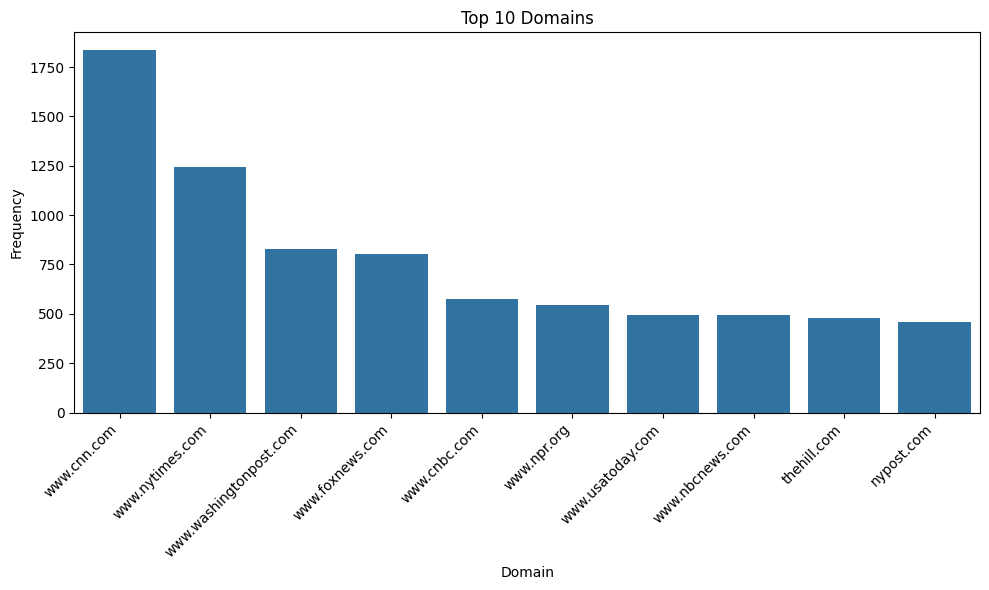

In [9]:
# Create a bar chart of the top 10 domains
top_domains = data['domain'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_domains.index, y=top_domains.values)
plt.title('Top 10 Domains')
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

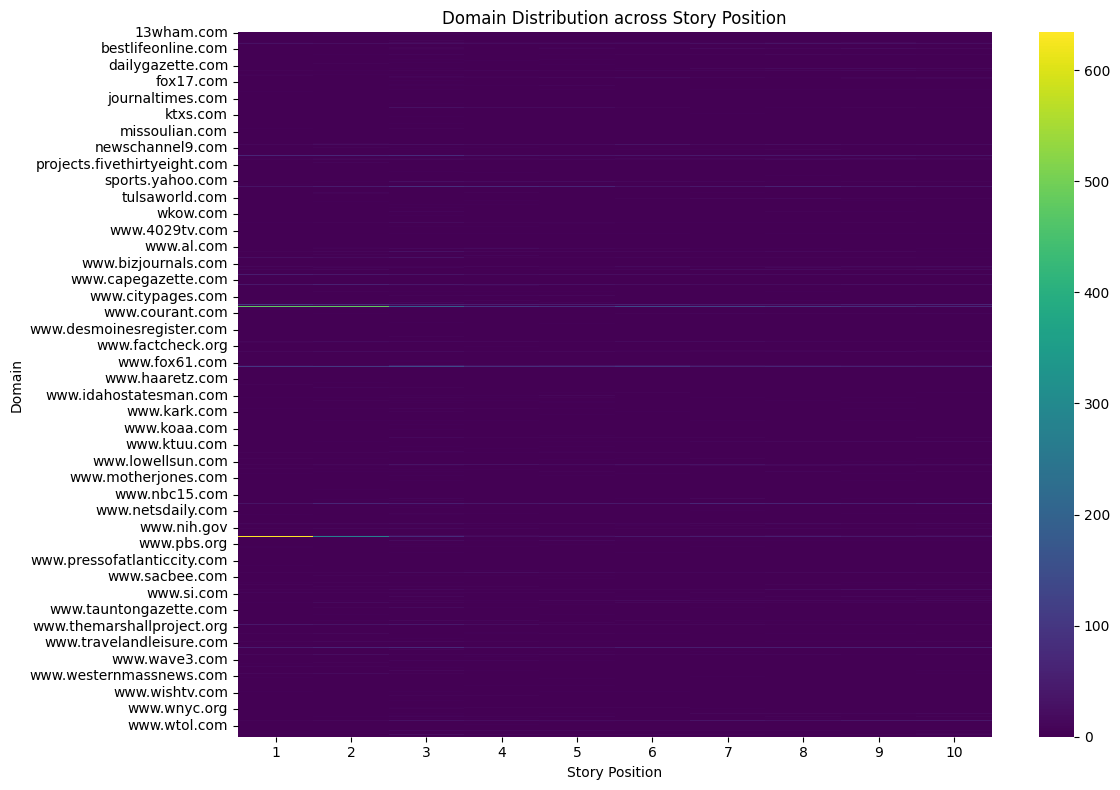

In [12]:
# Create a heatmap
heatmap_data = data.pivot_table(index='domain', columns='story_position', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Domain Distribution across Story Position')
plt.xlabel('Story Position')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

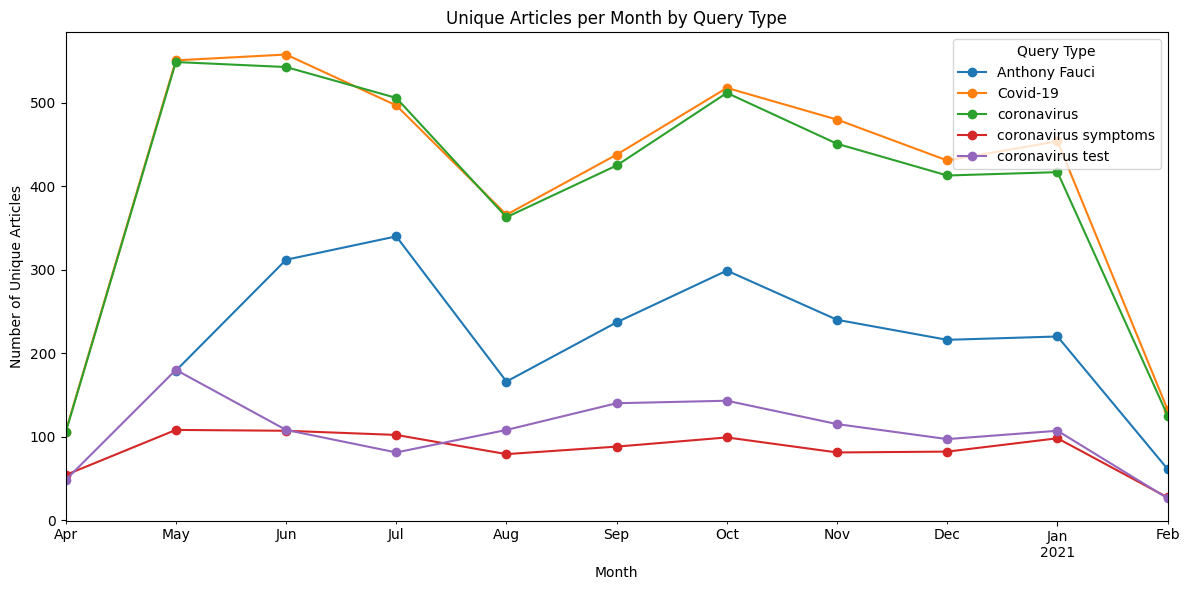

In [11]:
# Convert 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Create a time series of unique articles per month by query type
time_series_data = data.groupby([data['date'].dt.to_period('M'), 'query'])['title'].nunique().unstack()
time_series_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Unique Articles per Month by Query Type')
plt.xlabel('Month')
plt.ylabel('Number of Unique Articles')
plt.legend(title='Query Type')
plt.tight_layout()
plt.show()